In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
cc_data = pd.read_csv(r'BankChurners.csv')
cc_data.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [145]:
#Getting the data info
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [146]:
#Cleaning the data
cc_data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<AxesSubplot:title={'center':'Correlation between the variables of dataset'}>

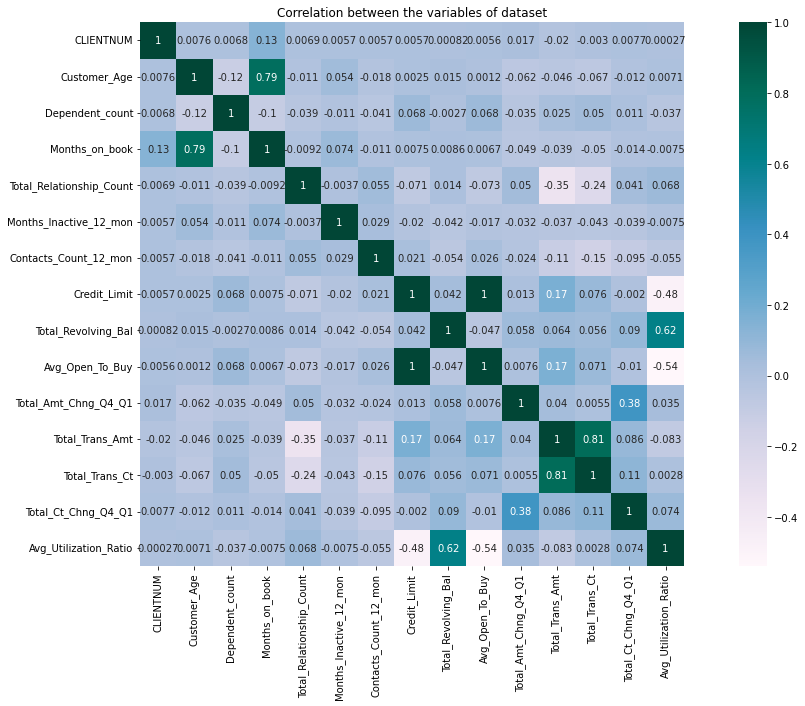

In [147]:
#Correlation between numerical features
plt.subplots(figsize=(20,10))
plt.title('Correlation between the variables of dataset')
sns.heatmap(cc_data.corr(),annot=True,square=True,cmap='PuBuGn')

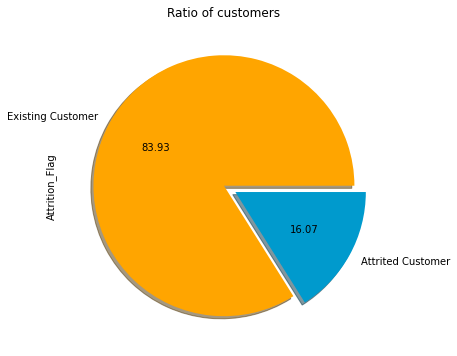

In [148]:
import matplotlib.pyplot as plt
cc_data['Attrition_Flag'].value_counts()
colors=('orange','#009ACD')
explode=[0,0.1]
cc_data['Attrition_Flag'].value_counts().plot(kind='pie',shadow='TRUE',explode=explode,colors=colors,autopct='%.2f',figsize=(8,6))
plt.title('Ratio of customers')
plt.show()

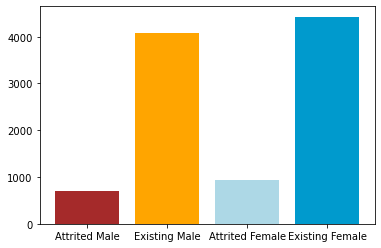

In [149]:
exist_female,exist_male = cc_data[cc_data['Attrition_Flag'] == 'Existing Customer']['Gender'].value_counts()
attrited_female,attrited_male = cc_data[cc_data['Attrition_Flag'] == 'Attrited Customer']['Gender'].value_counts()
plt.bar(['Attrited Male','Existing Male','Attrited Female','Existing Female'],[attrited_male,exist_male,attrited_female, exist_female],color=['brown','orange','lightblue','#009ACD'])
plt.show()

<AxesSubplot:title={'center':'Income categories of Existing and Attrited customers'}, xlabel='Income_Category'>

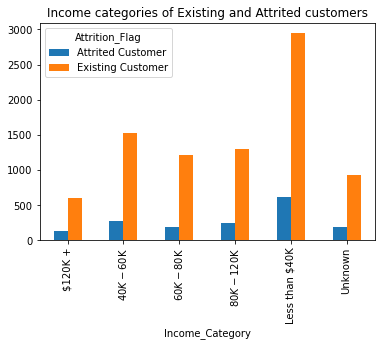

In [74]:
pt = cc_data[['Income_Category','Attrition_Flag']].pivot_table(index='Income_Category', columns='Attrition_Flag', aggfunc=len, fill_value=0)
pt.plot.bar(title='Income categories of Existing and Attrited customers')

<AxesSubplot:title={'center':'Credit Limits of Existing and Attrited customers'}, xlabel='bin_Credit_Limit'>

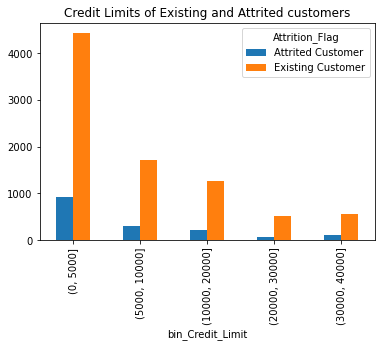

In [75]:
cc_data['bin_Credit_Limit'] = pd.cut(cc_data.Credit_Limit, [0,5000,10000,20000,30000,40000])

pt = cc_data[['bin_Credit_Limit','Attrition_Flag']].pivot_table(index='bin_Credit_Limit', columns='Attrition_Flag', aggfunc=len, fill_value=0)
pt.plot.bar(title='Credit Limits of Existing and Attrited customers')

<AxesSubplot:xlabel='Card_Category'>

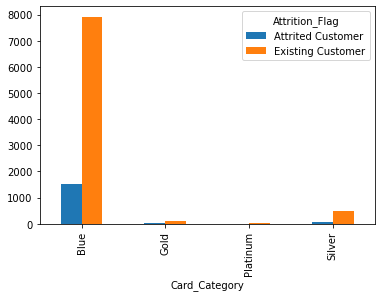

In [150]:
pt = cc_data[['Card_Category','Attrition_Flag']].pivot_table(index='Card_Category', columns='Attrition_Flag', aggfunc=len, fill_value=0)
pt.plot.bar()

<AxesSubplot:xlabel='Months_Inactive_12_mon'>

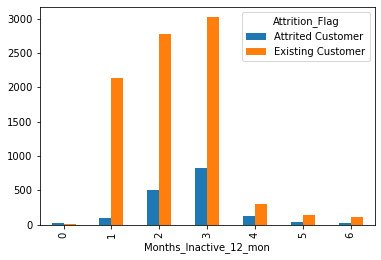

In [152]:
pt = cc_data[['Months_Inactive_12_mon','Attrition_Flag']].pivot_table(index='Months_Inactive_12_mon', columns='Attrition_Flag', aggfunc=len, fill_value=0)
pt.plot.bar()

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

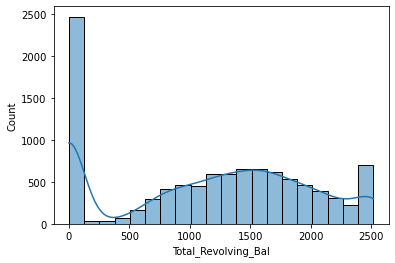

In [76]:
sns.histplot(cc_data['Total_Revolving_Bal'], kde=True)

In [77]:
#Churned customers have a much smaller revolving balance which, because they don't fully pay off their credit card balance, may signify that they have less disposable income than staying customers that know they can pay off their revolving balance

In [78]:
cat_features = cc_data.select_dtypes(['object','category']).columns.to_list()
data_cat = cc_data[cat_features]
data_cat

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,bin_Credit_Limit
0,Existing Customer,M,High School,Married,$60K - $80K,Blue,"(10000, 20000]"
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue,"(5000, 10000]"
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue,"(0, 5000]"
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue,"(0, 5000]"
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue,"(0, 5000]"
...,...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue,"(0, 5000]"
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue,"(0, 5000]"
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue,"(5000, 10000]"
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue,"(5000, 10000]"


In [79]:
a_map = {'Attrited Customer':1, 'Existing Customer':0}
cc_data['Attrition_Flag'] = cc_data['Attrition_Flag'].map(a_map)
g_map = {'M':0, 'F':1}
cc_data['Gender'] = cc_data['Gender'].map(g_map)

In [80]:
from sklearn.preprocessing import OrdinalEncoder

marital = OrdinalEncoder(categories=[['Unknown','Single','Married','Divorced']])
cc_data['Marital_Status'] = marital.fit_transform(data_cat[['Marital_Status']])
edu = OrdinalEncoder(categories=[['Unknown', 'Uneducated', 'High School', 'College','Graduate',
                                  'Post-Graduate','Doctorate']])
cc_data['Education_Level'] = edu.fit_transform(data_cat[['Education_Level']])
income = OrdinalEncoder(categories=[['Unknown','Less than $40K','$40K - $60K','$60K - $80K',
                                     '$80K - $120K','$120K +']])
cc_data['Income_Category'] = income.fit_transform(data_cat[['Income_Category']])
card = OrdinalEncoder(categories=[['Blue', 'Silver','Gold','Platinum']])
cc_data['Card_Category'] = card.fit_transform(data_cat[['Card_Category']])

In [81]:
cc_data[cat_features].head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,bin_Credit_Limit
0,0,0,2.0,2.0,3.0,0.0,"(10000, 20000]"
1,0,1,4.0,1.0,1.0,0.0,"(5000, 10000]"
2,0,0,4.0,2.0,4.0,0.0,"(0, 5000]"
3,0,1,2.0,0.0,1.0,0.0,"(0, 5000]"
4,0,0,1.0,2.0,3.0,0.0,"(0, 5000]"


In [82]:
cont = cc_data.select_dtypes(['float64','int64','category']).columns.to_list()
data_cont = cc_data[cont]
data_cont.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,bin_Credit_Limit
0,768805383,0,45,0,3,2.0,2.0,3.0,0.0,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,"(10000, 20000]"
1,818770008,0,49,1,5,4.0,1.0,1.0,0.0,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,"(5000, 10000]"
2,713982108,0,51,0,3,4.0,2.0,4.0,0.0,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,"(0, 5000]"
3,769911858,0,40,1,4,2.0,0.0,1.0,0.0,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,"(0, 5000]"
4,709106358,0,40,0,3,1.0,2.0,3.0,0.0,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,"(0, 5000]"


In [83]:
from sklearn.preprocessing import StandardScaler

credit = StandardScaler()
cc_data['Credit_Limit'] = credit.fit_transform(data_cont[['Credit_Limit']])
revolv_bal = StandardScaler()
cc_data['Total_Revolving_Bal'] = revolv_bal.fit_transform(data_cont[['Total_Revolving_Bal']])
avg_open = StandardScaler()
cc_data['Avg_Open_To_Buy'] = avg_open.fit_transform(data_cont[['Avg_Open_To_Buy']])
trans = StandardScaler()
cc_data['Total_Trans_Amt'] = trans.fit_transform(data_cont[['Total_Trans_Amt']])

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

def preprocessCustomersPipeline(cc_data):
    cc_data = cc_data.drop('CLIENTNUM', 1)
        #Categorical Features
    a_map = {'Attrited Customer':1, 'Existing Customer':0}
    cc_data['Attrition_Flag'] = cc_data['Attrition_Flag'].map(a_map)
    
    g_map = {'M':0, 'F':1}
    cc_data['Gender'] = cc_data['Gender'].map(g_map)
    
    marital = OrdinalEncoder(categories=[['Unknown','Single','Married','Divorced']])
    cc_data['Marital_Status'] = marital.fit_transform(cc_data[['Marital_Status']])

    edu = OrdinalEncoder(categories=[['Unknown', 'Uneducated', 'High School', 'College','Graduate',
                                      'Post-Graduate','Doctorate']])
    cc_data['Education_Level'] = edu.fit_transform(cc_data[['Education_Level']])

    income = OrdinalEncoder(categories=[['Unknown','Less than $40K','$40K - $60K','$60K - $80K',
                                         '$80K - $120K','$120K +']])
    cc_data['Income_Category'] = income.fit_transform(cc_data[['Income_Category']])

    card = OrdinalEncoder(categories=[['Blue', 'Silver','Gold','Platinum']])
    cc_data['Card_Category'] = card.fit_transform(cc_data[['Card_Category']])
    
    #Numerical Features
    credit = StandardScaler()
    cc_data['Credit_Limit'] = credit.fit_transform(cc_data[['Credit_Limit']])
    revolv_bal = StandardScaler()
    cc_data['Total_Revolving_Bal'] = revolv_bal.fit_transform(cc_data[['Total_Revolving_Bal']])
    avg_open = StandardScaler()
    cc_data['Avg_Open_To_Buy'] = avg_open.fit_transform(cc_data[['Avg_Open_To_Buy']])
    trans = StandardScaler()
    cc_data['Total_Trans_Amt'] = trans.fit_transform(cc_data[['Total_Trans_Amt']])
    
    nums = ['Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Amt', 'Total_Trans_Ct']
    for n in nums:
            s = StandardScaler()
            cc_data[n] = s.fit_transform(cc_data[[n]])
    return cc_data

In [188]:
data_raw = pd.read_csv(r'BankChurners.csv')
data_raw_shuffled = data_raw.sample(frac=1)

train = data_raw_shuffled.iloc[2025:,:]
test = data_raw_shuffled.iloc[:2025,:]

train_p = preprocessCustomersPipeline(train)
test_p = preprocessCustomersPipeline(test)

In [189]:
X_train = train_p.iloc[:,1:]
y_train = train_p.iloc[:,0]
X_test = test_p.iloc[:,1:]
y_test = test_p.iloc[:,0]

In [87]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import accuracy_score


#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
b_pred = knn.predict(X_test)
knn_acc=accuracy_score(b_pred,y_test)
print(knn_acc)


#XGB
xgb = xgboost.XGBClassifier(use_label_encoder=False)
xgb.fit(X_train, y_train)
d_pred = xgb.predict(X_test)
xgb_acc=accuracy_score(d_pred,y_test)
print(xgb_acc)

0.8641975308641975
[21:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9669135802469135


Confusion Matrix is : 
 [[1654   26]
 [  58  287]]


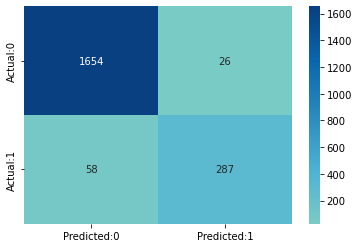

In [184]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Calculating Confusion Matrix for XBG
CM = confusion_matrix(y_test, d_pred)
print('Confusion Matrix is : \n', CM)
conf_matrix=pd.DataFrame(data=CM,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# drawing confusion matrix
sns.heatmap(conf_matrix, annot=True,fmt='d', center = True,cmap='GnBu')
plt.show()

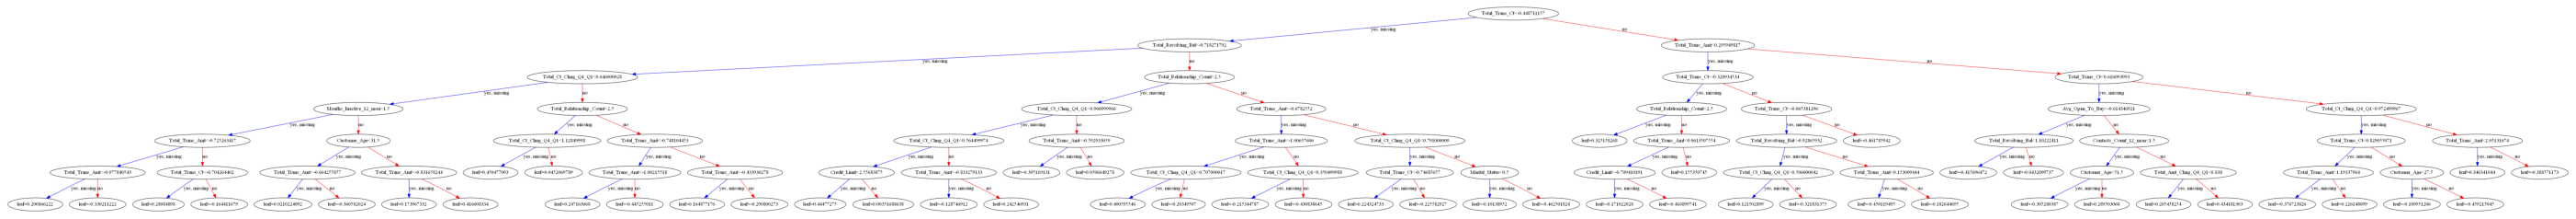

In [156]:
# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
plot_tree(xgb, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(50, 100)
plt.show()

[21:42:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


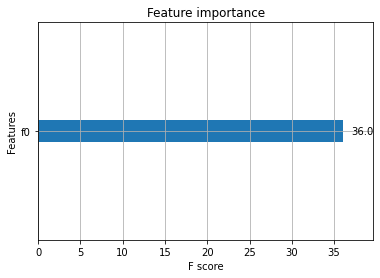

In [157]:
#Feature importance
from xgboost import plot_importance
xgb.fit(y_test, d_pred)
# plot feature importance
plot_importance(xgb)
plt.show()


In [158]:
#DNN
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(19,input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(7, activation="elu", kernel_initializer="LecunNormal"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2, activation="softmax",  kernel_initializer="he_normal")
])

In [160]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

In [161]:
print(f1_score) 
print(precision)
  

0.5140902996063232
0.6678819060325623


In [107]:
#send me your file okkk

In [162]:
####AUC

predict_prob=model.predict(X_test)
pred = predict_prob[:, 1]

In [163]:
import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred)
print('ROC AUC %.3f' % roc_auc)


ROC AUC 0.748


In [164]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.Nadam(learning_rate=0.001),metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
254/254 [==============================] - 3s 4ms/step - loss: 1.9780 - accuracy: 0.8047 - val_loss: 1.0416 - val_accuracy: 0.8380
Epoch 2/10
254/254 [==============================] - 1s 3ms/step - loss: 1.2245 - accuracy: 0.8361 - val_loss: 1.0088 - val_accuracy: 0.8296
Epoch 3/10
254/254 [==============================] - 1s 3ms/step - loss: 1.0523 - accuracy: 0.8303 - val_loss: 0.7665 - val_accuracy: 0.8568
Epoch 4/10
254/254 [==============================] - 1s 3ms/step - loss: 0.9531 - accuracy: 0.8403 - val_loss: 0.7470 - val_accuracy: 0.8548
Epoch 5/10
254/254 [==============================] - 1s 3ms/step - loss: 0.8723 - accuracy: 0.8498 - val_loss: 0.7494 - val_accuracy: 0.8528
Epoch 6/10
254/254 [==============================] - 1s 3ms/step - loss: 0.8987 - accuracy: 0.8397 - val_loss: 0.9998 - val_accuracy: 0.8365
Epoch 7/10
254/254 [==============================] - 1s 3ms/step - loss: 0.8463 - accuracy: 0.8340 - val_loss: 0.7490 - val_accuracy: 0.8425
Epoch 

In [165]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [166]:
a=history.history['accuracy'][9] 
print(a) 

0.8459639549255371


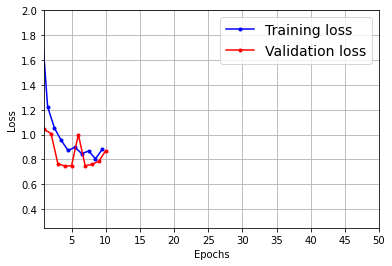

In [167]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.axis([1, 50, 0.25, 2])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [123]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

 

In [168]:
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

#xgb = xgb.XGBClassifier(max_depth=3, n_estimators=10, learning_rate=0.05, use_label_encoder=False)

xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=1, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None,  subsample=1, eval_metric='mlogloss')


xgb = xgb.fit(X_train, y_train)

In [169]:
print("Accuracy on training set: {:.3f}".format(xgb.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(xgb.score(X_test, y_test)))

Accuracy on training set: 0.974
Accuracy on test set: 0.948


In [170]:
model = xgboost.XGBClassifier(use_label_encoder=False)
y_pred = xgb.predict(X_test)
print(y_pred)
    


[0 0 0 ... 0 1 0]


In [171]:
from sklearn.metrics import f1_score

#y_pred_class = y_pred_pos > threshold
f1=f1_score(y_test, y_pred)
print(f1)

0.8341232227488152


In [172]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)

print(roc_auc)

0.8754658385093169


In [173]:
from sklearn.metrics import average_precision_score

avg=average_precision_score(y_test, y_pred)

print(avg)

0.7414492753623189


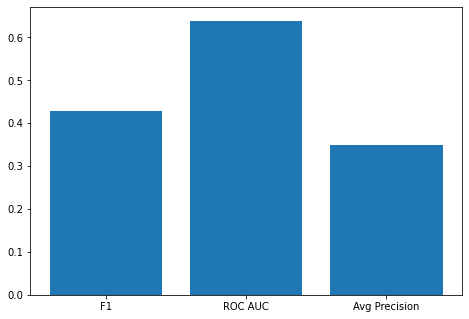

In [192]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['F1', 'ROC AUC', 'Avg Precision']
students = [f1,roc_auc,avg]
ax.bar(langs,students)
plt.show()

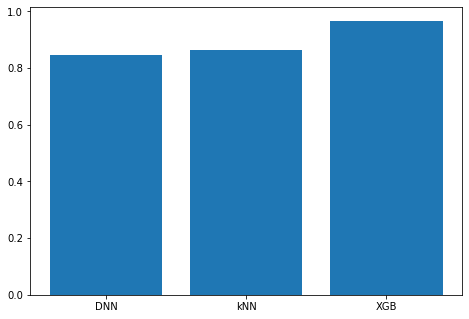

In [191]:
import matplotlib.pyplot as plt
fig = plt.figure()
bx = fig.add_axes([0,0,1,1])
index = ['DNN','kNN', 'XGB' ]
labels = [a,knn_acc, xgb_acc]
bx.bar(index, labels)
plt.show()

In [176]:
features={"base_score":0.5, "colsample_bylevel":1, "gamma":0.01,"learning_rate":0.1,"max_depth":7}  

<BarContainer object of 5 artists>

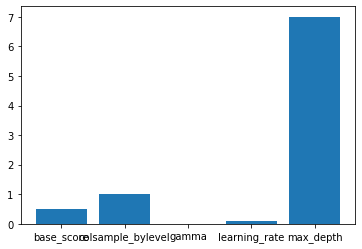

In [177]:
keys = features.keys()
values = features.values()

plt.bar(keys, values) 

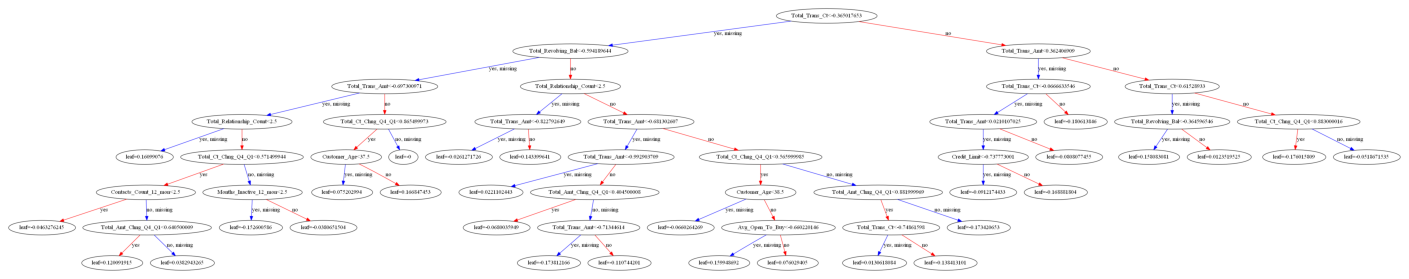

In [134]:
# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
plot_tree(xgb, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(25, 50)
plt.show()

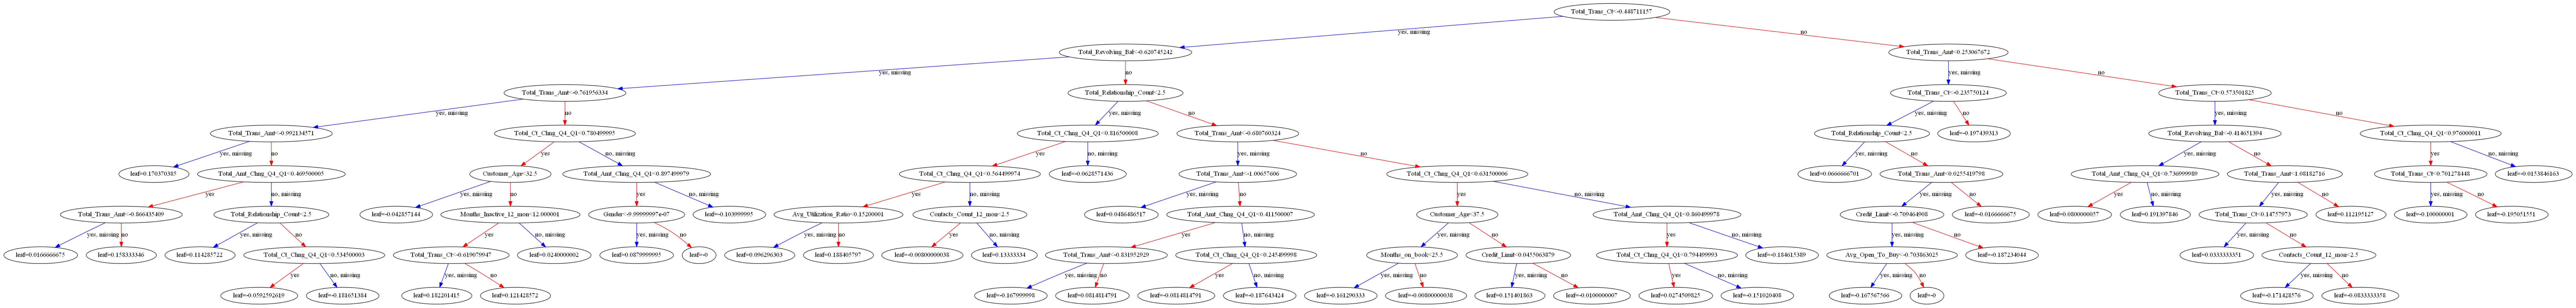

In [178]:
fig, ax = plt.subplots(figsize=(170, 170))
plot_tree(xgb, ax=ax)
plt.savefig("temp.pdf")
plt.show()

[0]	validation_0-logloss:0.47518	validation_1-logloss:0.48525
[1]	validation_0-logloss:0.35318	validation_1-logloss:0.37186
[2]	validation_0-logloss:0.27299	validation_1-logloss:0.29828
[3]	validation_0-logloss:0.21851	validation_1-logloss:0.24969
[4]	validation_0-logloss:0.17929	validation_1-logloss:0.21787
[5]	validation_0-logloss:0.14980	validation_1-logloss:0.19289
[6]	validation_0-logloss:0.12675	validation_1-logloss:0.17301
[7]	validation_0-logloss:0.11103	validation_1-logloss:0.16098
[8]	validation_0-logloss:0.09561	validation_1-logloss:0.14829
[9]	validation_0-logloss:0.08640	validation_1-logloss:0.13953
[10]	validation_0-logloss:0.07723	validation_1-logloss:0.13439
[11]	validation_0-logloss:0.07166	validation_1-logloss:0.12997
[12]	validation_0-logloss:0.06631	validation_1-logloss:0.12789
[13]	validation_0-logloss:0.06157	validation_1-logloss:0.12555
[14]	validation_0-logloss:0.05529	validation_1-logloss:0.12107
[15]	validation_0-logloss:0.05010	validation_1-logloss:0.11876
[1

[130]	validation_0-logloss:0.00329	validation_1-logloss:0.11501
[131]	validation_0-logloss:0.00325	validation_1-logloss:0.11494
[132]	validation_0-logloss:0.00321	validation_1-logloss:0.11476
[133]	validation_0-logloss:0.00318	validation_1-logloss:0.11476
[134]	validation_0-logloss:0.00315	validation_1-logloss:0.11474
[135]	validation_0-logloss:0.00312	validation_1-logloss:0.11509
[136]	validation_0-logloss:0.00307	validation_1-logloss:0.11544
[137]	validation_0-logloss:0.00305	validation_1-logloss:0.11542
[138]	validation_0-logloss:0.00302	validation_1-logloss:0.11566
[139]	validation_0-logloss:0.00298	validation_1-logloss:0.11568
[140]	validation_0-logloss:0.00296	validation_1-logloss:0.11574
[141]	validation_0-logloss:0.00293	validation_1-logloss:0.11572
[142]	validation_0-logloss:0.00290	validation_1-logloss:0.11588
[143]	validation_0-logloss:0.00288	validation_1-logloss:0.11592
[144]	validation_0-logloss:0.00285	validation_1-logloss:0.11575
[145]	validation_0-logloss:0.00282	valid

[259]	validation_0-logloss:0.00150	validation_1-logloss:0.12864
[260]	validation_0-logloss:0.00149	validation_1-logloss:0.12857
[261]	validation_0-logloss:0.00149	validation_1-logloss:0.12867
[262]	validation_0-logloss:0.00148	validation_1-logloss:0.12866
[263]	validation_0-logloss:0.00148	validation_1-logloss:0.12857
[264]	validation_0-logloss:0.00147	validation_1-logloss:0.12862
[265]	validation_0-logloss:0.00147	validation_1-logloss:0.12871
[266]	validation_0-logloss:0.00146	validation_1-logloss:0.12859
[267]	validation_0-logloss:0.00146	validation_1-logloss:0.12848
[268]	validation_0-logloss:0.00145	validation_1-logloss:0.12859
[269]	validation_0-logloss:0.00145	validation_1-logloss:0.12862
[270]	validation_0-logloss:0.00145	validation_1-logloss:0.12867
[271]	validation_0-logloss:0.00144	validation_1-logloss:0.12887
[272]	validation_0-logloss:0.00144	validation_1-logloss:0.12872
[273]	validation_0-logloss:0.00143	validation_1-logloss:0.12907
[274]	validation_0-logloss:0.00143	valid

[388]	validation_0-logloss:0.00110	validation_1-logloss:0.13442
[389]	validation_0-logloss:0.00110	validation_1-logloss:0.13447
[390]	validation_0-logloss:0.00110	validation_1-logloss:0.13461
[391]	validation_0-logloss:0.00110	validation_1-logloss:0.13451
[392]	validation_0-logloss:0.00109	validation_1-logloss:0.13450
[393]	validation_0-logloss:0.00109	validation_1-logloss:0.13448
[394]	validation_0-logloss:0.00109	validation_1-logloss:0.13444
[395]	validation_0-logloss:0.00109	validation_1-logloss:0.13446
[396]	validation_0-logloss:0.00109	validation_1-logloss:0.13478
[397]	validation_0-logloss:0.00109	validation_1-logloss:0.13487
[398]	validation_0-logloss:0.00108	validation_1-logloss:0.13471
[399]	validation_0-logloss:0.00108	validation_1-logloss:0.13466
[400]	validation_0-logloss:0.00108	validation_1-logloss:0.13460
[401]	validation_0-logloss:0.00108	validation_1-logloss:0.13458
[402]	validation_0-logloss:0.00108	validation_1-logloss:0.13460
[403]	validation_0-logloss:0.00107	valid

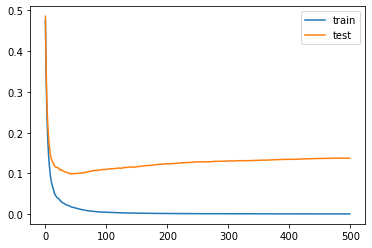

In [179]:
import matplotlib
import matplotlib.pyplot as plt
model = XGBClassifier(n_estimators=500)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

In [186]:
#KNN

from sklearn.metrics import f1_score

#y_pred_class = y_pred_pos > threshold
f1=f1_score(y_test, b_pred)
print(f1)

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, b_pred)

print(roc_auc)

from sklearn.metrics import average_precision_score

avg=average_precision_score(y_test, b_pred)

print(avg)

0.4276729559748428
0.6388975155279504
0.3484584980237154
